In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [4]:
from shortfall.sim import Simulator, SimConfig
from shortfall.miners.repay_proportional import RepayProportionalShortfallMinerState
from shortfall.miners.burn import BurnShortfallMinerState
from shortfall.miners.repay_ratchet import RepayRatchetShortfallMinerState
from shortfall.miners.base import BaseMinerState
from shortfall.network import *
from shortfall.strategy import *
from shortfall.consts import *
import shortfall.gradient.base_cost_models as bcm

import dataclasses
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

from mpl_toolkits.axes_grid1 import make_axes_locatable
import pickle
from tqdm.auto import tqdm
from ipywidgets import *

In [31]:
x=1000
apy=0.25
t=np.arange(1,365*2+1)

In [32]:
# approximate daily compounding by continuous
y = np.log(1+0.25)
repayment_schedule = x * np.exp(y * t/365.)

<IPython.core.display.Javascript object>


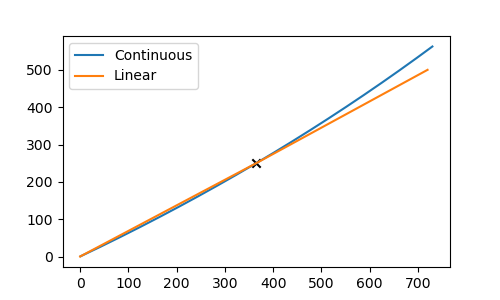

In [36]:
plt.figure(figsize=(5,3))
# plt.subplot(1,2,1)
# plt.plot(t, repayment_schedule1-x, label='Continuous-1')
plt.plot(t, repayment_schedule-x, label='Continuous')
plt.plot([0,365,720],[0,250,500], label='Linear')
plt.scatter([365], [apy*x], marker='x', color='k')

# plt.subplot(1,2,2)
# plt.plot(t, repayment_schedule1-repayment_schedule2)
# plt.plot([0,365,720],[0,250,500], label='Linear')
plt.legend()